<a href="https://colab.research.google.com/github/dorrabennour/Deep-learning-experimentations/blob/main/TP1_RN_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install -U tensorflow==1.14.0 keras==2.2.4 h5py scipy sklearn matplotlib pandas nltk pillow

In [ ]:
#conda list

In [ ]:
import numpy as np
import math


In [ ]:
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# Exercice 0 : Visualisation

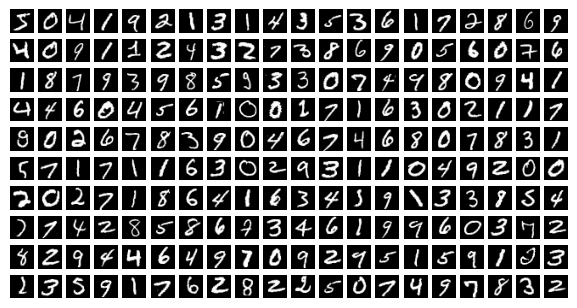

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('TKAgg')
plt.figure(figsize=(7.195, 3.841), dpi=100)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
X_train.shape

(60000, 784)

Les images se trouvent dans un espace de taille (nbre d'images, 784), Ce sont des images en noir et blanc, normalisées centrées de 28 pixels de côté

# Exercice 1 : Régression Logistique¶

Nombre de paramètres du modèles: nbre des paramètres de la couche + nbre de biais =784*10+10=7850

## Formulation du problème d’apprentissage

On a $L_{w,b}(D)=-\frac{1}{N} \sum_{i=1}^{N} \log(\hat{y}_{c*,i}) $

## Implémentation de l’apprentissage

In [ ]:
from keras.utils import np_utils
K=10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, K)
Y_test = np_utils.to_categorical(y_test, K)

In [ ]:
def softmax(X):
 # Input matrix X of size Nbxd - Output matrix of same size
 E = np.exp(X)
 return (E.T / np.sum(E,axis=1)).T

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((m,10))
    A= softmax(np.dot(X,w)+b)  
    
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
             Y_prediction[i,j] = 1 if A[i, j] > 0.5 else 0
    assert(Y_prediction.shape == (m,10))
    
    return Y_prediction

In [ ]:
# GRADED FUNCTION: random_mini_batches
batch_size = 100
def random_mini_batches(X, Y, mini_batch_size = batch_size, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[0]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,: ]
    shuffled_Y = Y[permutation,: ]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[ k * mini_batch_size: (k+1)*mini_batch_size,:]
        mini_batch_Y = shuffled_Y[ k * mini_batch_size : (k+1)*mini_batch_size,:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[ m-mini_batch_size*math.floor(m/mini_batch_size):,:]
        mini_batch_Y = shuffled_Y[  m-mini_batch_size*math.floor(m/mini_batch_size):,:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
N = X_train.shape[0]
d = X_train.shape[1]
W = np.zeros((d,K))
b = np.zeros((1,K))
numEp = 20 # Number of epochs for gradient descent
eta = 1e-1 # Learning rate
learning_rate=1e-1

batch_size = 100
nb_batches = int(float(N) / batch_size)
gradW = np.zeros((d,K))
gradb = np.zeros((1,K))
num_iterations=1000
#seed = 10                        
for epoch in range(numEp):
    #seed = seed + 1
    minibatches = random_mini_batches(X_train, Y_train, batch_size)
    cost_total = 0
    for minibatch in minibatches:
        (minibatch_X, minibatch_Y) = minibatch
     # FORWARD PASS : compute prediction with current params for examples in batch
        m = minibatch_X.shape[0]
        A = softmax(np.dot(minibatch_X,W)+b)                                   # compute activation
        cost = -(1/m)*(np.sum(np.log(A)))                        # compute cost

     # BACKWARD PASS :
      # 1) compute gradients for W and b
        dw = 1/m*(np.dot(minibatch_X.T,A-minibatch_Y))
        db =1/m* np.sum(A-minibatch_Y)
      # 2) update W and b parameters with gradient descent
        W = W - (learning_rate* dw)
        b = b - (learning_rate* db)
        #grads, cost=propagate(W, b, minibatch_X, minibatch_Y)
   
        #params, grads, costs=optimize(W, b, minibatch_X, minibatch_Y, eta, print_cost = False)
        params = {"w": W,
              "b": b}
    
        grads = {"dw": dw,
             "db": db}
    

In [ ]:
w=params['w']
b=params['b']

In [ ]:
Y_prediction_test = predict(w, b, X_test)
Y_prediction_train = predict(w, b, X_train)

In [ ]:
def accuracy(W, b, images, labels):
  pred = predict(w, b, images)
  return np.where( pred.argmax(axis=1) != labels.argmax(axis=1) , 0.,1.).mean()*100.0

In [ ]:
print(accuracy(w,b,X_train,Y_train))

91.03999999999999


# Exercice 2 : Perceptron multi-couches (MLP)

## Prédiction avec un Perceptron (Forward)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
#initialisation des paramètres 

N = X_train.shape[0]
d = X_train.shape[1]
L=100

Wh = np.zeros((d,L))
bh = np.zeros((1,L))
Wy = np.zeros((L,K))
by = np.zeros((1,K))

dWh = np.zeros((d,L))
dbh = np.zeros((1,L))
dWy = np.zeros((L,K))
dby = np.zeros((1,K))

numEp = 20 # Number of epochs for gradient descent
eta = 1e-1 # Learning rate
learning_rate=1e-1

batch_size = 100
nb_batches = int(float(N) / batch_size)




num_iterations=1000

In [ ]:

#seed = 10                        
for epoch in range(numEp):
    #seed = seed + 1
    minibatches = random_mini_batches(X_train, Y_train, batch_size)
    cost_total = 0
    for minibatch in minibatches:
        (X, Y) = minibatch
     # FORWARD PASS : compute prediction with current params for examples in batch
        Z1 = np.dot(X,Wh)+bh
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1,Wy)+by
        A2 = softmax(Z2)                      # compute cost

     # BACKWARD PASS :
      # 1) compute gradients for W and b
        dZ2 = A2-Y
        dWy = (1/m)*np.dot(A1,dZ2)
        dby = (1/m) *np.sum(dZ2,axis=1,keepdims=True)
        
        dZ1=np.dot(dZ2,Wy.T)*(Z1*(1-Z1))
        dWh = (1/m)*np.dot(X.T,dZ1)
        dbh = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
      # 2) update W and b parameters with gradient descent

    
        Wh = Wh-(learning_rate*dWh)
        bh = bh-(learning_rate*dbh)
        Wy = Wy-(learning_rate*dWy)
        by = by-(learning_rate*dby)

        params = {"wh": Wh,
              "wy": Wy, "bh":bh,"by":by}
    
        grads = {"dwh": dWh,
              "dwy": dWy, "dbh":dbh,"dby":dby}
    

In [ ]:
dbhgrads['dbh']

In [ ]:
def predict(parameters, X):
    wh=parameters['wh']
    bh=parameters['bh']
    wy=parameters['wy']
    by=parameters['by']

    m = X.shape[0]
    Y_prediction = np.zeros((m,10))
    Z1 = np.dot(X,Wh)+bh
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1,Wy)+by
    A2 = softmax(Z2)                      
    
    for i in range(A2.shape[0]):
        for j in range(A2.shape[1]):
             Y_prediction[i,j] = 1 if A2[i, j] > 0.5 else 0
    
    return Y_prediction
     


In [ ]:
by=params['by']

In [ ]:
bh.shape

(1, 100)

In [ ]:
wh.shape

(784, 100)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
Y_prediction_train=predict(params,X_train)
Y_prediction_test=predict(params,X_test)

ValueError: ignored

In [ ]:
def accuracy(W, b, images, labels):
  pred = predict(w, b, images)
  return np.where( pred.argmax(axis=1) != labels.argmax(axis=1) , 0.,1.).mean()*100.0

91.03999999999999
